In [471]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import h3
from tqdm import tqdm

print(os.getcwd())

import sys
from pathlib import Path

Path().resolve().parent

# Add utils to path
ROOT_PATH = Path().resolve().parent
print(f"{ROOT_PATH=}")
DATA_RAW_PATH = ROOT_PATH / "for_participants" / "data_parquet"
DATA_PROCESSED_PATH = ROOT_PATH / "for_participants" / "preprocessed_data"
DATA_DF_ALL_PATH = ROOT_PATH / "merged_dfs" / "df_all.parquet"
# assert DATA_PATH.exists()
sys.path.append(str(ROOT_PATH))
print(f"{DATA_RAW_PATH=}")
print(f"{DATA_PROCESSED_PATH=}")

# ASSIGNMENT_DIR = Path().resolve().parent
# HANDIN_DIR = ASSIGNMENT_DIR / 'handin'
OUTPUT_DIR = ROOT_PATH / 'output'

def read_data(file_name, path = DATA_RAW_PATH):
    df_tmp = pd.read_parquet(path / f'{file_name}.parquet')
    print(df_tmp.shape)
    return df_tmp


import warnings
warnings.filterwarnings('ignore')

/Users/tymoteuszbarcinski/DTU/WEC2025/wec2025/TB
ROOT_PATH=PosixPath('/Users/tymoteuszbarcinski/DTU/WEC2025/wec2025')
DATA_RAW_PATH=PosixPath('/Users/tymoteuszbarcinski/DTU/WEC2025/wec2025/for_participants/data_parquet')
DATA_PROCESSED_PATH=PosixPath('/Users/tymoteuszbarcinski/DTU/WEC2025/wec2025/for_participants/preprocessed_data')


In [472]:
df = pd.read_parquet(DATA_DF_ALL_PATH)
print(df.shape)

df['weekend'] = df['weekedn']
df['weekend_holiday'] = np.maximum(df['weekend'], df['is_holiday'])
df['y'] = df['traffic']
df['holiday'] = df['is_holiday']


(102480, 368)


In [88]:
# df['weekend'] = df['weekedn']
# df['weekend_holiday'] = np.maximum(df['weekend'], df['is_holiday'])
# df['y'] = df['traffic']
# df['holiday'] = df['is_holiday']

# unique_station_id = df['station_id'].unique()
# # unique_station_id = np.array([2307, 2309])
# n_max = 30

# fig, ax = plt.subplots(n_max, 2, figsize=(10, n_max*4))
# for i, station_id in enumerate(unique_station_id[0:n_max]):
#     df_station = df.loc[lambda x: x['station_id'] == str(station_id)]
#     df0 = df_station.loc[lambda x: x['weekend_holiday'] == 0]
#     df1 = df_station.loc[lambda x: x['weekend_holiday'] == 1]
#     ax[i, 0].scatter(df0['hour'], df0['y'], s = 1, alpha=0.5, c = df0['dayofweek'])
#     ax[i, 1].scatter(df1['hour'], df1['y'], s = 1, alpha=0.5, c = df1['dayofweek'])
#     ax[i, 0].set_title(f"station_id: {station_id} weekend_holiday: 0")
#     ax[i, 1].set_title(f"station_id: {station_id} weekend_holiday: 1")
#     ax[i, 0].legend()

# plt.savefig(OUTPUT_DIR / 'station_week_holiday.png')

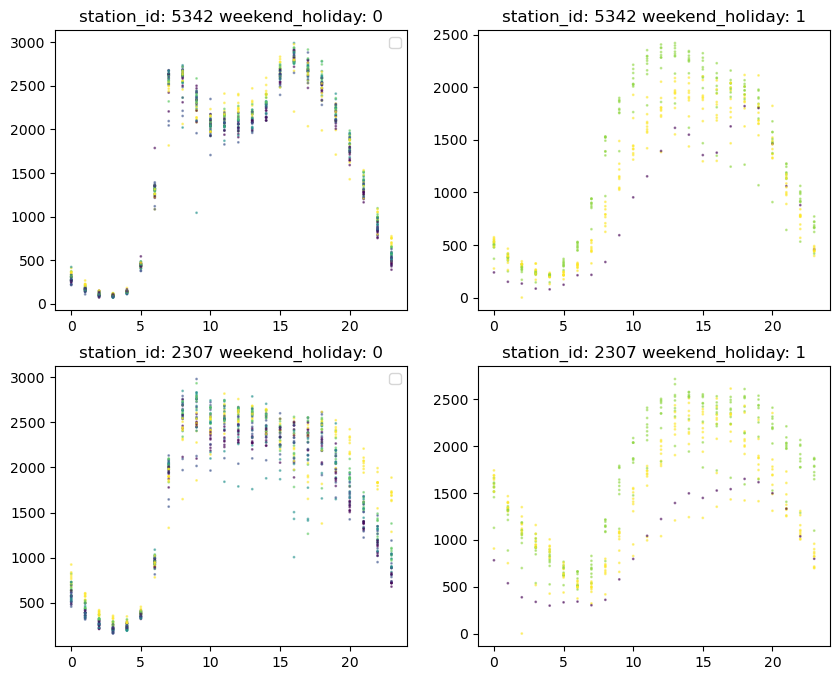

In [473]:

# unique_station_id = df['station_id'].unique()
# station_highway = np.array([1318, 1366, 9398])
# stations_marszaflowska = np.array([2307, 2309])
stations_marszaflowska = np.array([5342, 2307])
unique_station_id = stations_marszaflowska.astype(str)
n_max = unique_station_id.shape[0]

fig, ax = plt.subplots(n_max, 2, figsize=(10, n_max*4))
for i, station_id in enumerate(unique_station_id[0:n_max]):
    df_station = df.loc[lambda x: x['station_id'] == station_id]
    df0 = df_station.loc[lambda x: x['weekend_holiday'] == 0]
    df1 = df_station.loc[lambda x: x['weekend_holiday'] == 1]
    ax[i, 0].scatter(df0['hour'], df0['y'], s = 1, alpha=0.5, c = df0['dayofweek'])
    ax[i, 1].scatter(df1['hour'], df1['y'], s = 1, alpha=0.5, c = df1['dayofweek'])
    ax[i, 0].set_title(f"station_id: {station_id} weekend_holiday: 0")
    ax[i, 1].set_title(f"station_id: {station_id} weekend_holiday: 1")
    ax[i, 0].legend()


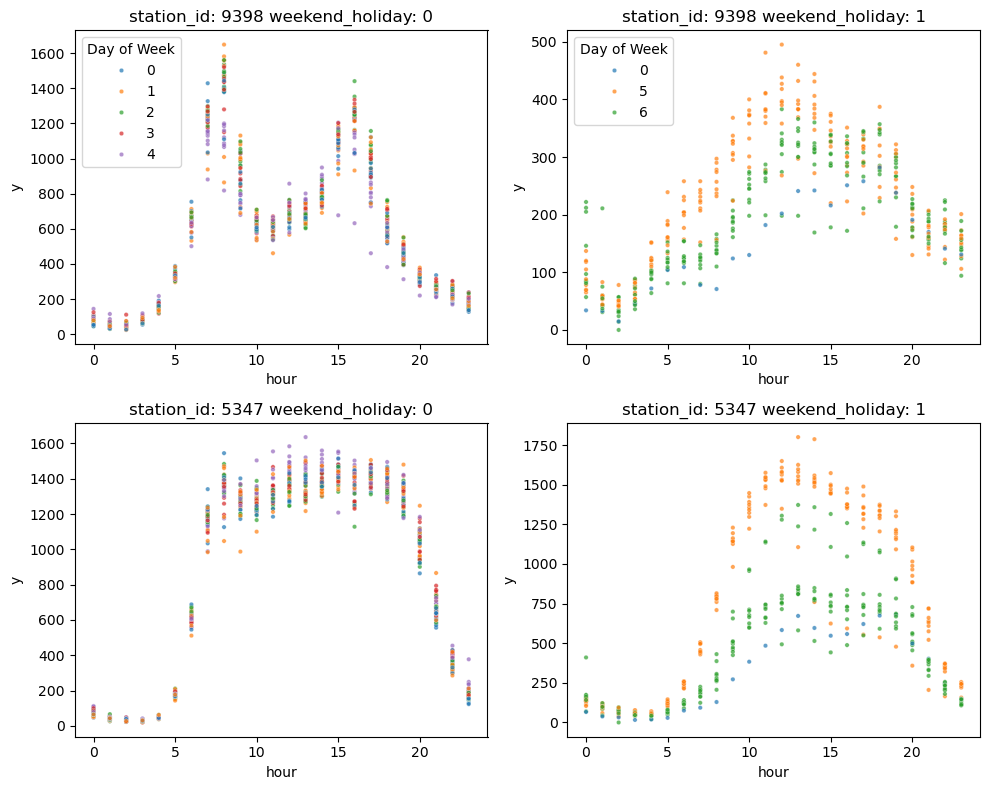

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

stations_plot = np.array([9398, 5347])
n_max = stations_plot.shape[0]

# Create subplots
fig, ax = plt.subplots(n_max, 2, figsize=(10, n_max * 4))

for i, station_id in enumerate(stations_plot):
    # Filter data for the current station_id
    df_station = df.loc[lambda x: x['station_id'] == str(station_id)]
    df0 = df_station.loc[lambda x: x['weekend_holiday'] == 0]
    df1 = df_station.loc[lambda x: x['weekend_holiday'] == 1]

    # Plot for weekend_holiday == 0
    sns.scatterplot(
        data=df0,
        x='hour',
        y='y',
        hue='dayofweek',  # Color points based on dayofweek
        palette='tab10',  # Use a distinct color palette
        s=10,  # Point size
        alpha=0.7,  # Transparency
        ax=ax[i, 0]  # Plot on the left subplot
    )

    # Plot for weekend_holiday == 1
    sns.scatterplot(
        data=df1,
        x='hour',
        y='y',
        hue='dayofweek',  # Color points based on dayofweek
        palette='tab10',  # Use the same color palette
        s=10,
        alpha=0.7,
        ax=ax[i, 1]  # Plot on the right subplot
    )

    # Set titles for subplots
    ax[i, 0].set_title(f"station_id: {station_id} weekend_holiday: 0")
    ax[i, 1].set_title(f"station_id: {station_id} weekend_holiday: 1")

    # Add legends only for the first row
    if i == 0:
        ax[i, 0].legend(title="Day of Week", bbox_to_anchor=(0, 1), loc='upper left')
        ax[i, 1].legend(title="Day of Week", bbox_to_anchor=(0, 1), loc='upper left')
    else:
        ax[i, 0].get_legend().remove()
        ax[i, 1].get_legend().remove()

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'weekend_no_weekend.png')
plt.show()

In [372]:
df_subset = df.loc[lambda x: x['weekend_holiday'] == 0]
df_subset['station_id'] = df_subset['station_id'].astype(int)

# df_subset = df_subset.loc[lambda x: x['station_id'].isin(unique_station_id)]
# df_subset = df_subset.loc[lambda x: x['station_id'] == '5342']

hour_mean = np.arange(7,20)
# `df_subset.loc[lambda x: x['hour'].isin(hour_mean)].groupby('station_id')['traffic'].mean().reset_index()

# df_subset_grouped = df_subset.groupby(['station_id', 'hour'])['traffic'].mean().reset_index()

# df_pivot = df_subset_grouped.pivot(index='station_id', columns='hour', values='traffic')`

df_subset_hours = df_subset.loc[lambda x: x['hour'].isin([7, 8, 9])]

In [131]:
# df_subset.groupby(['hour'])[['signal_ctn_m_100_0', 'traffic']].agg(['sum', 'mean'])\
#         .plot.scatter(x = 'signal_ctn_m_100_0', y = 'traffic', s = 2)

In [474]:
# df_hour_mean = df_subset.loc[lambda x: x['hour'].isin(hour_mean)]\
#     .groupby(['station_id', 'date'])[['signal_ctn_m_50_0', 'traffic']]\
#     .agg({"signal_ctn_m_50_0": "sum", "traffic": "mean"})

hour_to_group = hour_mean
# hour_to_group = [7, 8, 9]
# hour_to_group = [17]
# x_column = "signal_ctd_m_75_0"
x_column = "signal_ctd_m_100_0"
# x_column = "signal_ctd_m_125_0"

df_hour_mean = df_subset.loc[lambda x: x['hour'].isin(hour_to_group)]\
    .groupby(['station_id', 'date'])[[x_column, 'traffic']]\
    .agg({x_column: "sum", "traffic": "mean"})

df_hour_mean = df_hour_mean.reset_index()
df_hour_mean['station_id'] = df_hour_mean['station_id'].astype(int)

<Axes: xlabel='signal_ctd_m_100_0', ylabel='traffic'>

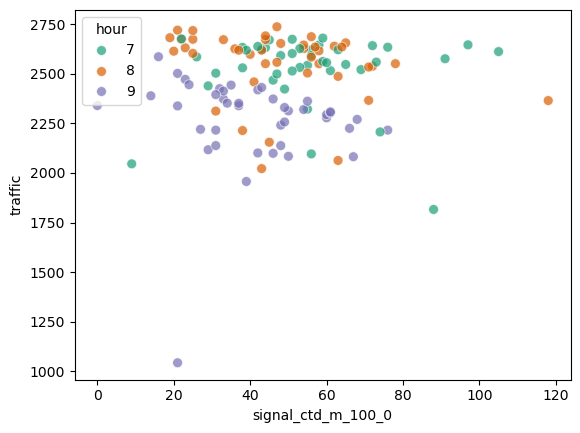

In [475]:
# plt.scatter(
#     df_hour_mean.loc[lambda x: x['station_id'] == 5342][x_column],
#     df_hour_mean.loc[lambda x: x['station_id'] == 5342]['traffic'],
# )

# plt.scatter(
#     df_subset.loc[lambda x: x['station_id'] == 5342][x_column],
#     df_subset.loc[lambda x: x['station_id'] == 5342]['traffic'],
#     c = df_subset.loc[lambda x: x['station_id'] == 5342]['hour'],
#     cmap='Dark2',
# )

df_filtered = df_subset.loc[lambda x: x['station_id'] == 5342]\
    .loc[lambda x: x['hour'].isin([7, 8, 9])]
sns.scatterplot(
    data=df_filtered,
    x=x_column,
    y='traffic',
    hue='hour',  # Use 'hour' for color
    palette='Dark2',  # Seaborn palette
    s=50,  # Size of the points
    alpha=0.7  # Transparency
)

In [476]:
df_subset_station = df_subset.groupby(['station_id', 'hour'])[[x_column, 'traffic']]\
    .agg({x_column: "sum", "traffic": "mean"})
df_subset_station = df_subset_station.reset_index()
df_subset_station['station_id'] = df_subset_station['station_id'].astype(int)

In [477]:
# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(
#     (df_subset_station[x_column]),
#     (df_subset_station['traffic']),
#     s=2,
#     c=df_subset_station['station_id'],  # Use station_id for color
#     cmap='Dark2',
# )

# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(
#     (df_subset_station['hour']),
#     (df_subset_station[x_column]),
#     s=2,
#     c=df_subset_station['station_id'],  # Use station_id for color
#     cmap='Dark2',
# )

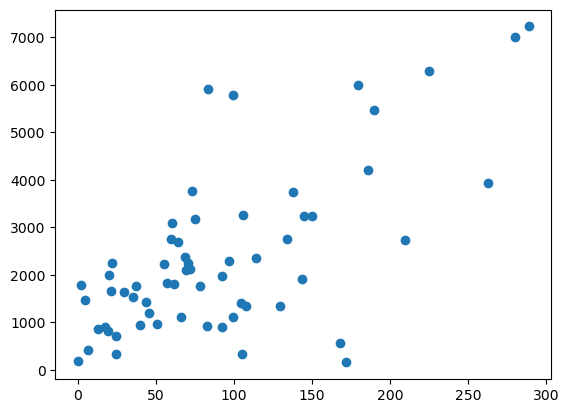

In [478]:
df_hour_mean_days = df_hour_mean.groupby(['station_id'])[[x_column, 'traffic']].mean()

fucntion_transform = lambda x: x
# fucntion_transform = lambda x: np.sqrt(x)

df_hour_mean_days_plot = df_hour_mean_days\
    .loc[lambda x: fucntion_transform(x[x_column]) < fucntion_transform(400)]
plt.scatter(
    fucntion_transform(df_hour_mean_days_plot[x_column]),
    fucntion_transform(df_hour_mean_days_plot['traffic'])
)

In [479]:
fucntion_transform(df_hour_mean_days_plot[[x_column, 'traffic']]).corr()

,signal_ctd_m_100_0,traffic
signal_ctd_m_100_0,1.000000,0.662243
traffic,0.662243,1.000000


# ROADS

In [480]:
hour_to_group = [17]
hour_to_group = [7,8,9]
# x_column = "signal_ctd_m_75_0"
x_column = "signal_ctd_m_100_0"
# x_column = "signal_ctd_m_125_0"

df_hour_mean = df_subset.loc[lambda x: x['hour'].isin(hour_to_group)]\
    .groupby(['station_id'])[[x_column, 'traffic']]\
    .agg({x_column: "sum", "traffic": "mean"})

df_hour_mean = df_hour_mean.reset_index()
df_hour_mean['station_id'] = df_hour_mean['station_id'].astype(str)

['3310' '3379' '5342' '5368']


<Axes: xlabel='signal_ctd_m_100_0', ylabel='traffic'>

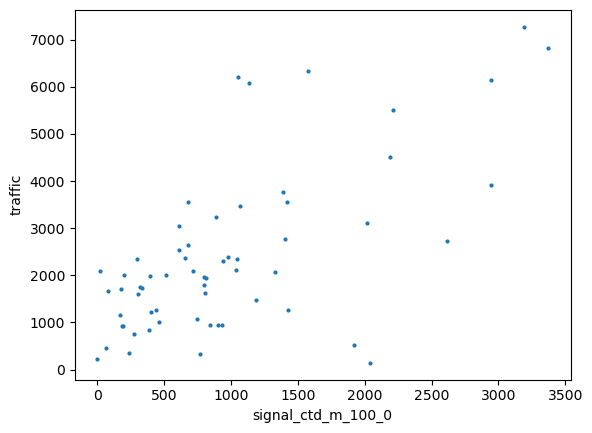

In [481]:
station_patology = df_hour_mean.loc[lambda x: x[x_column] > 4000]['station_id'].unique()
print(station_patology)

df_hour_mean.loc[lambda x: ~x['station_id'].isin(station_patology)]\
    .plot.scatter(x = x_column, y = 'traffic', s = 4)

In [658]:
df_hour_mean_to_join = df_hour_mean.rename(columns = {
    x_column: x_column + "_" + str(hour_to_group[0]) + "_" + str(hour_to_group[-1]),
    "traffic": "traffic" + "_" + str(hour_to_group[0]) + "_" + str(hour_to_group[-1])
})

df_v2 = df.drop(columns = ['street', 'segment', 'h3res13'])

df_v2 = df_v2.merge(df_hour_mean_to_join, on = 'station_id', how = 'left')
numeric_columns = list(df_v2.select_dtypes(include=['float', 'int']).columns)

df_static = df_v2[['station_id'] + numeric_columns].groupby(['station_id'])[numeric_columns].mean()
print(df_static.columns)
df_static = df_static.reset_index()

# df_static = df_static.loc[lambda x: x['station_id'].isin(station_patology)].astype(int)

df_quantile = df.groupby(['station_id'])[[x_column, 'traffic']].quantile(0.95).reset_index()\
    .rename(columns = {'traffic': 'traffic_95', x_column: x_column + "_95"})
df_static = df_static.merge(df_quantile, on = 'station_id', how = 'left')

Index(['lat', 'lon', 'hour', 'traffic', 'Residential_0_2', 'Service_0_2',
       'Work_0_2', 'Residential_0_5', 'Service_0_5', 'Work_0_5',
       ...
       'signal_ctd_rho_98', 'is_holiday', 'dayofweek', 'weekedn', 'weekend',
       'weekend_holiday', 'y', 'holiday', 'signal_ctd_m_100_0_7_9',
       'traffic_7_9'],
      dtype='object', length=366)


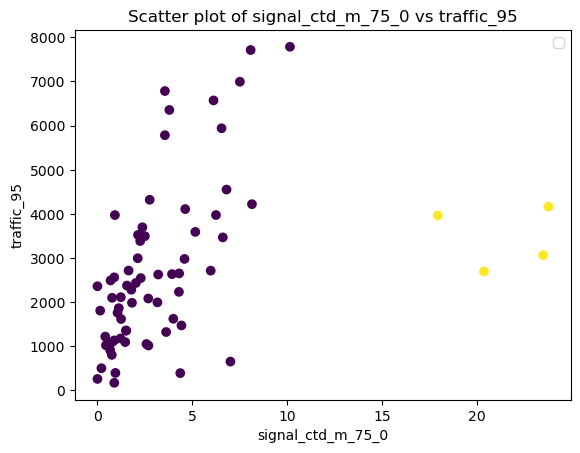

In [ ]:
# df_static.loc[lambda x: x['station_id'].isin(station_patology)].astype(int)
df_static['is_in_patology'] = df_static['station_id'].isin(station_patology).astype(int)

# df_static = df_static.loc[lambda x: x['is_in_patology'] == 0]

plt.scatter(df_static['signal_ctd_m_75_0'], df_static['traffic_95'], c = df_static['is_in_patology'])
plt.xlabel('signal_ctd_m_75_0')
plt.ylabel('traffic_95')
plt.title('Scatter plot of signal_ctd_m_75_0 vs traffic_95')
plt.legend()
plt.savefig(OUTPUT_DIR / 'signal_ctd_m_75_0_traffic_95.png')

In [497]:
correlations_with_traffic = df_static.corr()['traffic_95']

# Quantile


In [668]:
df_modelling = df_static.copy()

df_modelling = df_modelling.loc[lambda x: x['is_in_patology'] == 0]

df_modelling['intercept'] = 1
df_modelling['pets_0_5_transformed'] = np.clip(df_modelling['pets_0_5'], 0, 4)

X_columns = [
    'intercept',
    'signal_ctd_m_75_0',
    'beauty_and_spa_wd0_2',
    'pets_0_5_transformed',
    'roads_intensity_1_0_1',
    'roads_intensity_2_0_2',
    'automotive_3'
]

y_column = "traffic_95"

X_train = df_modelling[X_columns]
Y_train = df_modelling[y_column]

mod0 = sm.OLS(Y_train, X_train)
mod0 = mod0.fit()
df_modelling['resid'] = mod0.resid

mod0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             traffic_95   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     26.35
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           5.32e-15
Time:                        10:51:19   Log-Likelihood:                -547.58
No. Observations:                  66   AIC:                             1109.
Df Residuals:                      59   BIC:                             1124.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept              1520.3176    611.818      2.485      0.016     296.072    2744.563
signal_ctd_m_75_0       513.2653     60.233      8.521      0.000     392.740     633.790
beauty_and_spa_wd0_2   -157.6591     48.720     -3.236      0.002    -255.147     -60.171
pets_0_5_transformed   -388.4266    110.264     -3.523      0.001    -609.065    -167.788
roads_intensity_1_0_1  2661.5302   1268.068      2.099      0.040     124.133    5198.927
roads_intensity_2_0_2 -1778.0148    803.691     -2.212      0.031   -3386.196    -169.833
automotive_3              3.1914      1.711      1.865      0.067      -0.233       6.616
==============================================================================
Omnibus:                        1.695   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                0.996
Skew:                           0.223   Prob(JB):                        0.608
Kurtosis:                       3.403   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

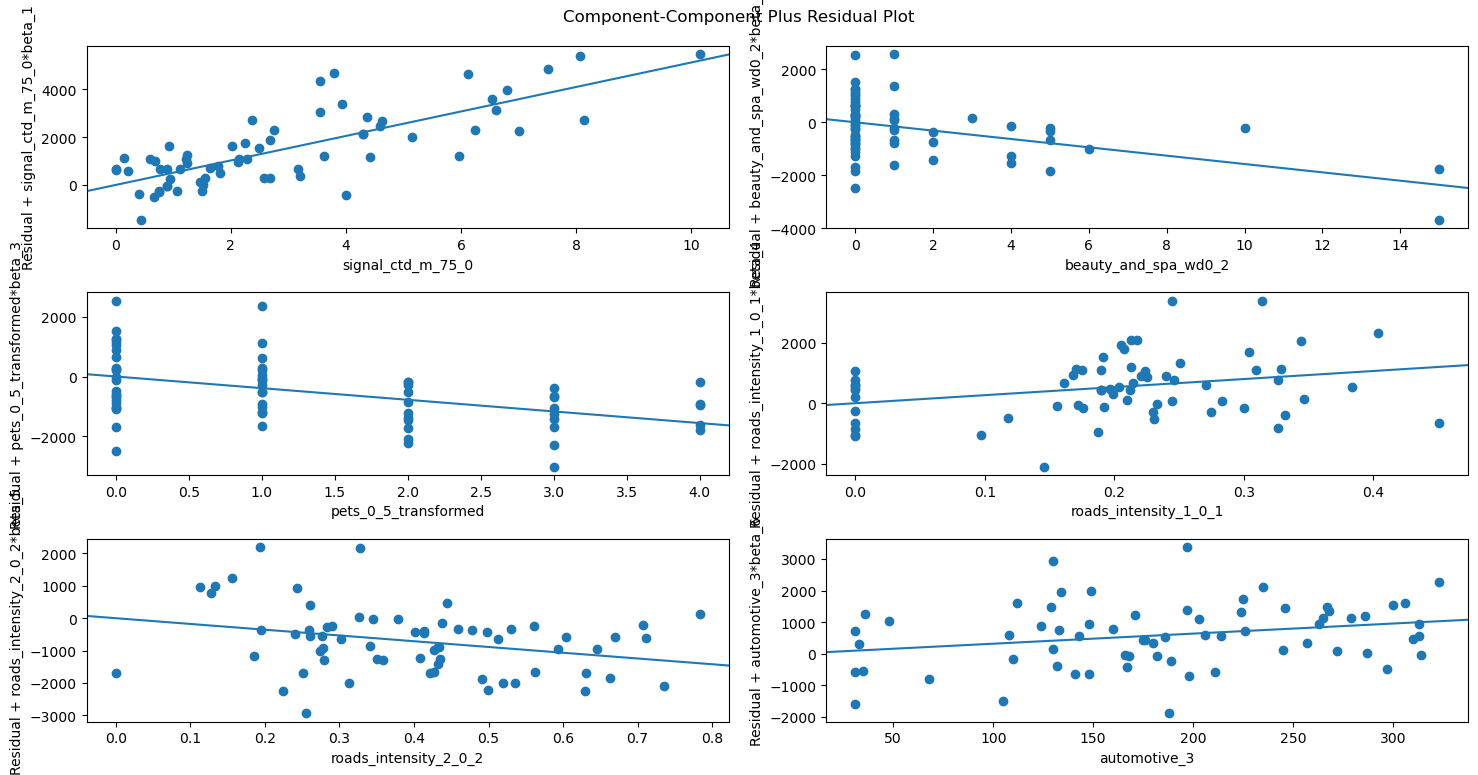

In [669]:
fig = plt.figure(figsize=(15, 10))

# Generate the CCPR grid plot
sm.graphics.plot_ccpr_grid(mod0, fig=fig)  # Pass the figure to the function

# Adjust layout for better spacing
fig.tight_layout(pad=1.5)

In [548]:
df_modelling.corr()['resid'].abs().sort_values().dropna().tail(30)

signal_ctn_m_25_0                0.148200
female6599_1                     0.152307
structure_and_geography_wd0_2    0.153014
pets_wd0_4                       0.153392
total6599_1                      0.153403
female6599_2                     0.154773
male6599_1                       0.155048
total6599_2                      0.156301
roads_intensity_3_0_2            0.157524
roads_intensity_1_1              0.157898
male6599_2                       0.158815
roads_intensity_1_0_2            0.162892
automotive_5                     0.166923
religious_organization_wd0_4     0.167552
Residential_0_5                  0.171051
roads_intensity_1_0_5            0.178845
structure_and_geography_wd0_4    0.179225
signal_ctn_m_75_0                0.183051
signal_ctn_m_100_0               0.187896
automotive_3                     0.194040
signal_ctn_m_125_0               0.194508
pets_2                           0.202097
signal_ctn_m_50_0                0.210199
roads_intensity_1_0_1            0

# HOURLY pattern

In [ ]:
df_v2_quantile = (
    df_v2.groupby(['station_id', 'date'], as_index=False)  # Group by station_id and date
    .agg(traffic_95=('traffic', lambda x: np.quantile(x, 0.95)))  # Calculate 95th percentile
)
df_v2_quantile = df_v2_quantile.rename(columns={'traffic_95': 'traffic_95_new'})

In [553]:
df_v2 = df_v2.merge(
    df_v2_quantile,
    on=['station_id', 'date'],
    how='left')

In [572]:
df_v2['is_in_patology'] = df_v2['station_id'].isin(station_patology).astype(int)
df_v2 = df_v2.loc[lambda x: x['is_in_patology'] == 0]

In [573]:
df_v2['y_scaled'] = df_v2['traffic'] / df_v2['traffic_95_new']

# Define the breakpoints
x_1 = 5
x_2 = 8
x_3 = 15

# Define the columns for the design matrix (X)
df_v2['intercept'] = 1
df_v2['hour_squared'] = df_v2['hour'] ** 2

df_v2['x_1'] = np.maximum(df_v2['hour'] - x_1, 0)
df_v2['x_1_squared'] = df_v2['x_1'] ** 2
df_v2['x_2'] = np.maximum(df_v2['hour'] - x_2, 0)
df_v2['x_2_squared'] = df_v2['x_2'] ** 2
df_v2['x_3'] = np.maximum(df_v2['hour'] - x_3, 0)
df_v2['x_3_squared'] = df_v2['x_3'] ** 2

X_columns = [
    'intercept',
    'hour',
    'hour_squared',
    'x_1',
    'x_1_squared',
    'x_2',
    'x_2_squared',
    'x_3',
    'x_3_squared'
]




In [574]:
unique_station_id = df_v2['station_id'].unique()

In [575]:
unique_station_id.shape

(66,)

In [579]:
coef_array = np.zeros((unique_station_id.shape[0], len(X_columns)))

for idx, station in enumerate(unique_station_id):

    df2_weekday = df_v2\
        .loc[lambda x: x['weekend_holiday'] == 0]\
        .loc[lambda x: x['station_id'] == str(station)]

    # Define the columns to include in the regression

    X = df2_weekday[X_columns]
    Y = df2_weekday['y_scaled']
    mod5 = sm.OLS(Y, X).fit()
    mod5.summary()

    coef_array[idx, :] = mod5.params.values

In [593]:
df_coefs = pd.DataFrame(coef_array, columns = X_columns, index = unique_station_id).reset_index()\
    .rename(columns = {'index': 'station_id'})
df_coefs['diff_x_garb'] = df_coefs['x_1_squared'] - df_coefs['x_2_squared']

In [596]:
df_v3 = df_static.merge(df_coefs, on = 'station_id', how = 'left')

In [610]:
df_v3.corr()['diff_x_garb'].abs().sort_values().dropna().tail(25)

active_life_wd0_6              0.607615
retail_wd0_4                   0.610720
business_to_business_wd0_4     0.610900
hour_squared                   0.613284
mass_media_1                   0.613643
health_and_medical_wd0_6       0.614795
active_life_wd0_8              0.616618
education_wd1                  0.616883
retail_wd0_6                   0.620968
x_1                            0.622245
health_and_medical_1           0.623728
education_wd0_8                0.627154
Residential_1                  0.628405
active_life_wd1                0.629274
health_and_medical_0_5         0.630064
education_wd0_6                0.630565
education_0_5                  0.631376
traffic_7_9                    0.635360
health_and_medical_wd0_8       0.643461
health_and_medical_wd1         0.644205
health_and_medical_wd1_SQRT    0.675078
x_2                            0.786684
x_2_squared                    0.977831
x_1_squared                    0.983198
diff_x_garb                    1.000000


In [ ]:
# Residential_0.2	Residential_0.5	Residential_1	Residential_1.5	Residential_2

# bussines_hours_poi_0_5	bussines_hours_poi_1

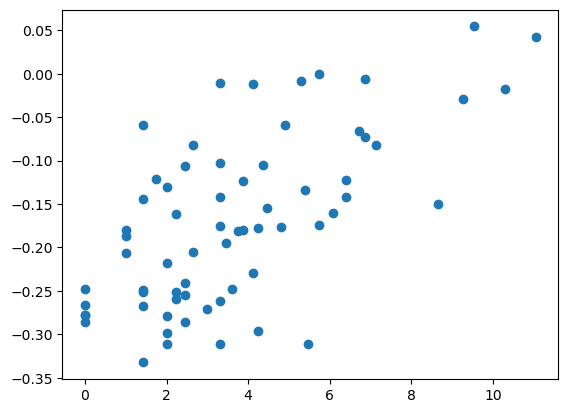

In [608]:
plt.scatter(np.sqrt(df_v3['education_0_5']), df_v3['diff_x_garb'])

In [651]:
df_v3['retail_wd0_2_SQRT'] = np.sqrt(df_v3['retail_wd0_2'])
# df_v3['mass_media_1_2'] = np.sqrt(df_v3['mass_media_1'])
df_v3['mass_media_1_2'] = df_v3['mass_media_1'] ** 2
df_v3['health_and_medical_wd1_log'] = np.log(1 + df_v3['health_and_medical_wd1'])

X_garb = df_v3[['intercept', 'health_and_medical_wd1_SQRT', 'retail_wd0_2_SQRT']]
Y_garb = df_v3['diff_x_garb']
mod5 = sm.OLS(Y_garb, X_garb).fit()
df_v3['resid_garb'] = mod5.resid

mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            diff_x_garb   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              68.42
Date:                Sun, 13 Apr 2025   Prob (F-statistic):                    8.51e-20
Time:                        14:42:13   Log-Likelihood:                          61.550
No. Observations:                  66   AIC:                                     -117.1
Df Residuals:                      63   BIC:                                     -110.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
intercept                      -2.0633      0.186    -11.119      0.000      -2.434      -1.692
health_and_medical_wd1_SQRT     0.0104      0.004      2.762      0.008       0.003       0.018
retail_wd0_2_SQRT               0.0405      0.010      4.000      0.000       0.020       0.061
==============================================================================
Omnibus:                        4.153   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                1.984
Skew:                          -0.001   Prob(JB):                        0.371
Kurtosis:                       2.151   Cond. No.                         119.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

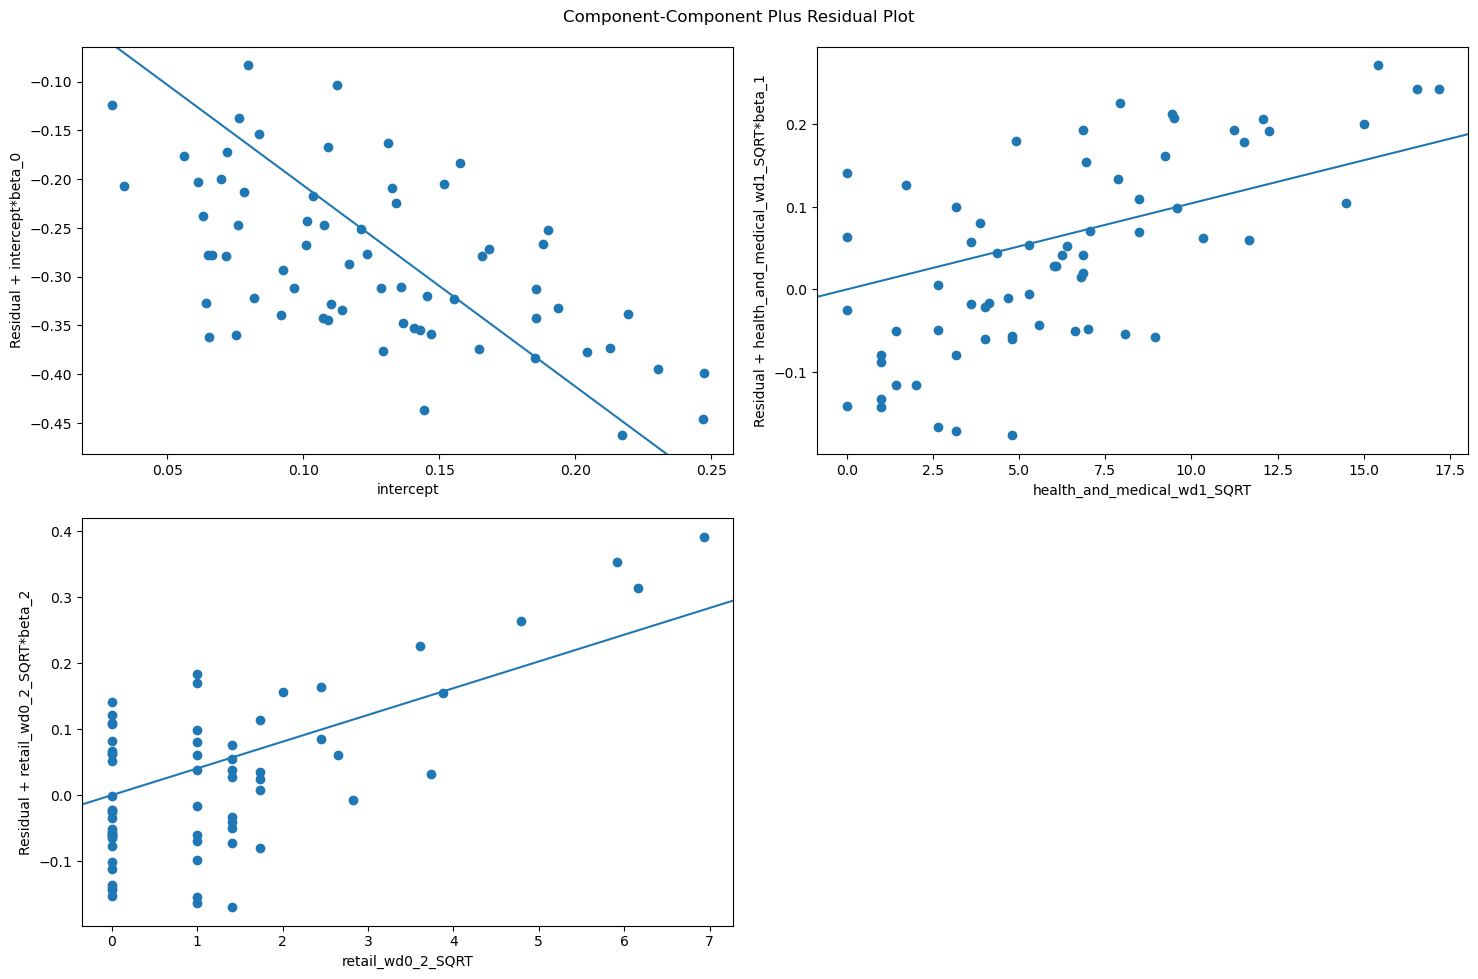

In [652]:
fig = plt.figure(figsize=(15, 10))

# Generate the CCPR grid plot
sm.graphics.plot_ccpr_grid(mod5, fig=fig)  # Pass the figure to the function

# Adjust layout for better spacing
fig.tight_layout(pad=1.5)

In [647]:
df_v3.corr()['resid_garb'].abs().sort_values().dropna().tail(25)

religious_organization_5            0.565005
home_service_wd0_2                  0.565991
financial_service_wd0_2             0.566677
arts_and_entertainment_1            0.569828
mass_media_1                        0.585457
attractions_and_activities_wd0_4    0.586071
active_life_1                       0.587608
signal_ctd_rho_98                   0.591296
signal_ctd_rho_95                   0.591905
signal_ctd_rho_85                   0.592475
signal_ctd_rho_90                   0.592502
signal_ctn_rho_98                   0.594946
professional_services_wd0_2         0.595938
signal_ctn_rho_95                   0.595977
retail_wd0_2_SQRT                   0.596307
signal_ctn_rho_90                   0.597556
signal_ctn_rho_85                   0.598871
diff_x_garb                         0.599131
business_to_business_wd0_2          0.602175
mass_media_1_SQRT                   0.613668
retail_wd0_2                        0.643282
x_1                                 0.713281
x_2_square

In [602]:
df_v3['health_and_medical_wd1_SQRT'] = np.sqrt(df_v3['health_and_medical_wd1'])

In [609]:
df_v3[['health_and_medical_wd1_SQRT', 'Residential_1', 'education_0_5']].corr()

,health_and_medical_wd1_SQRT,Residential_1,education_0_5
health_and_medical_wd1_SQRT,1.000000,0.906947,0.891728
Residential_1,0.906947,1.000000,0.761422
education_0_5,0.891728,0.761422,1.000000


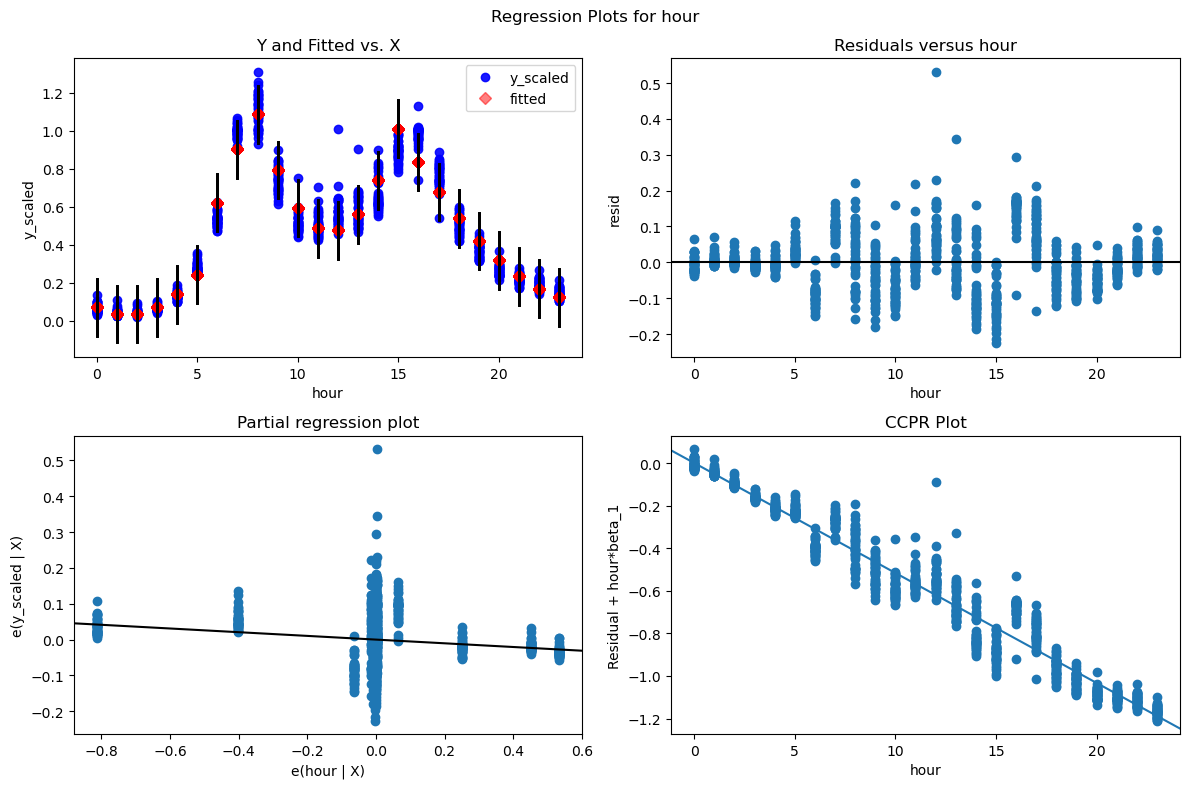

In [564]:
# Plot diagnostic plots
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(mod5, 'hour', fig=fig)
plt.tight_layout()
plt.show()

In [656]:
df_v3.sort_values(by = ["Residential_2", 'health_and_medical_wd1'])[['station_id', 'Residential_2', 'health_and_medical_wd1']]

,station_id,Residential_2,health_and_medical_wd1
7,1380,559622.59,1.0
1,1321,847002.45,1.0
8,1381,1724848.52,0.0
3,1366,1860183.14,2.0
6,1372,3707536.81,0.0
...,...,...,...
11,2304,36916204.54,210.0
51,5327,38400224.62,107.0
12,2305,39773624.48,225.0
14,2307,40151662.35,295.0


In [657]:
df_v3.sort_values(by = "health_and_medical_wd1")[['station_id', 'health_and_medical_wd1']]

,station_id,health_and_medical_wd1
2,1365,0.0
6,1372,0.0
8,1381,0.0
44,4356,0.0
1,1321,1.0
...,...,...
11,2304,210.0
12,2305,225.0
15,2309,238.0
13,2306,274.0
